# Introduction and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_airline, load_uschange, load_basic_motions
from sktime.utils.plotting import plot_series

## Intro

### Time Series Data

<Axes: xlabel='Period'>

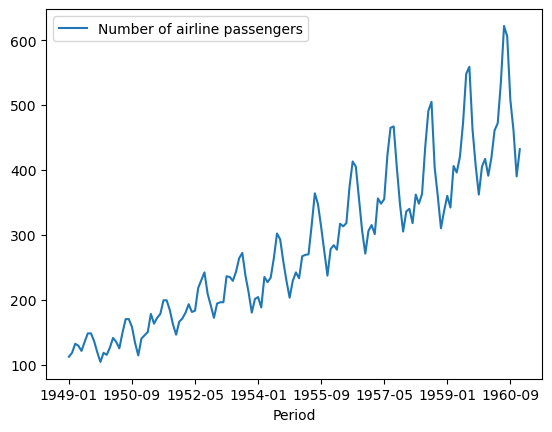

In [2]:
univariate_ts = pd.read_csv("data/airline.csv", index_col=0)
univariate_ts.plot()

<Axes: >

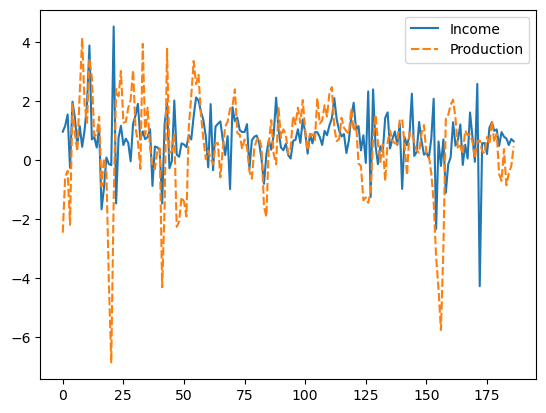

In [3]:
_, multivariate_ts = load_uschange()
sns.lineplot(data=multivariate_ts.iloc[:, :2], color="C0")

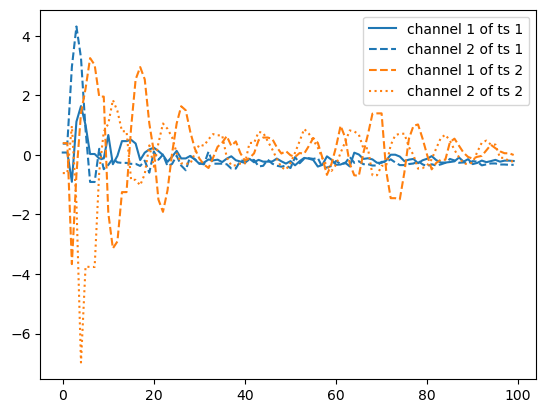

In [4]:
multivariate_ts_panel, labels = load_basic_motions()
colors = ["C0", "C1"]
linestyles = ["-", "--", ":", "-."]
for i in range(2):
    for j in range(2):
        multivariate_ts_panel.iloc[j, i].plot(color=colors[i], linestyle=linestyles[i + j], label=f"channel {j+1} of ts {i+1}")
plt.legend()
plt.show()

## Load the data

In [5]:
# from csv
ts = pd.read_csv("data/airline.csv", index_col=0)
ts.head()

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [6]:
# directly from sktime
ts = load_airline()
ts.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

## Some basic statistics

In [7]:
ts.shape

(144,)

In [8]:
len(ts)

144

In [9]:
ts.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', length=144)

In [10]:
# what is the frequency of the time series?
ts.index.freqstr

'M'

In [11]:
ts.index.year

Index([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
       ...
       1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
      dtype='int64', name='Period', length=144)

In [12]:
# how many values from each year?
ts.index.year.value_counts()

Period
1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: count, dtype: int64

In [13]:
ts.array

<NumpyExtensionArray>
[112.0, 118.0, 132.0, 129.0, 121.0, 135.0, 148.0, 148.0, 136.0, 119.0,
 ...
 419.0, 461.0, 472.0, 535.0, 622.0, 606.0, 508.0, 461.0, 390.0, 432.0]
Length: 144, dtype: float64

In [14]:
ts.to_numpy()

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [15]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Number of airline passengers, dtype: float64

In [16]:
ts.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Series name: Number of airline passengers
Non-Null Count  Dtype  
--------------  -----  
144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


## Plotting

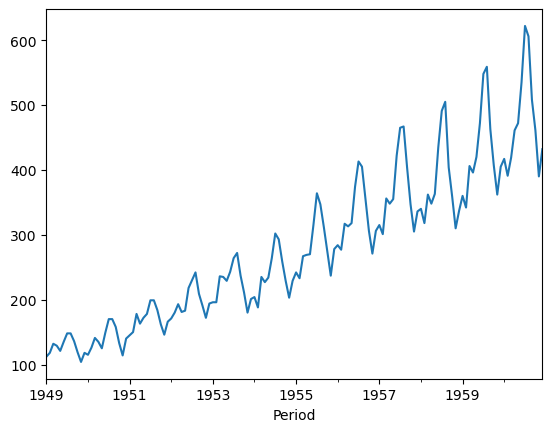

In [17]:
# pandas
ts.plot()
plt.show()

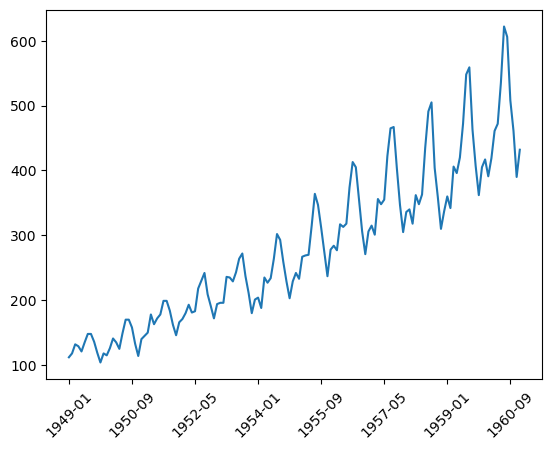

In [18]:
# matplotlib
plt.plot(ts.index.astype("str"), ts.to_numpy())
plt.xticks(ts.index.astype("str")[::20], rotation=45)
plt.show()

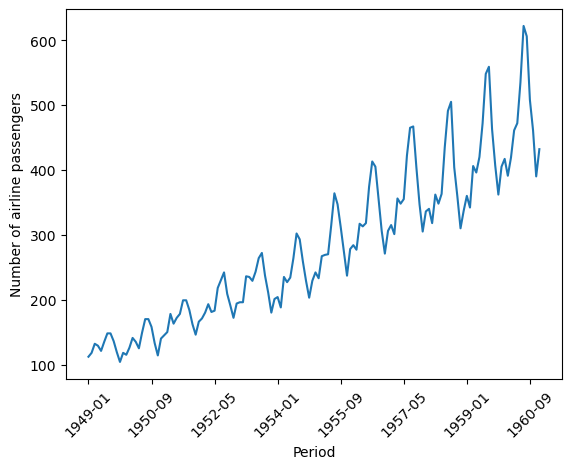

In [19]:
# seaborn
sns.lineplot(x=ts.index.astype("str"), y=ts)
plt.xticks(ts.index.astype("str")[::20], rotation=45)
plt.show()

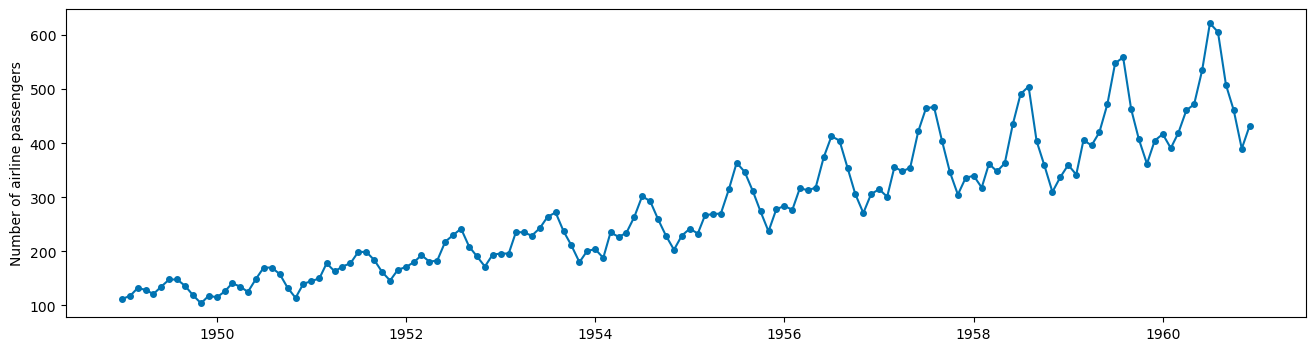

In [20]:
# sktime
plot_series(ts)
plt.show()

<Axes: >

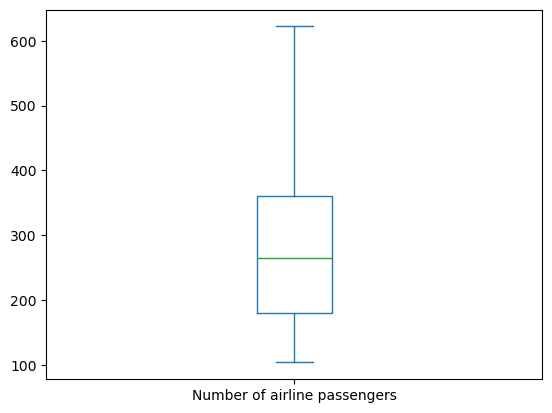

In [21]:
ts.plot(kind="box")

<Axes: ylabel='Frequency'>

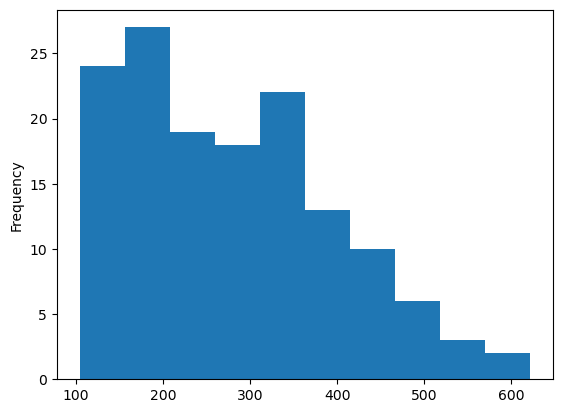

In [22]:
ts.plot(kind="hist")

<Axes: >

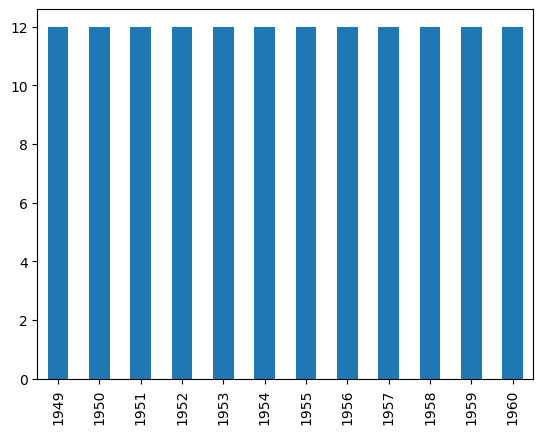

In [23]:
# how many values from each year?
ts.index.strftime("%Y").value_counts().sort_index().plot(kind="bar")

## Missing Values

In [24]:
ts_missing = ts.copy().to_numpy()

# add missing values for demonstration
ts_missing[::10] = np.nan
ts_missing[::11] = np.nan

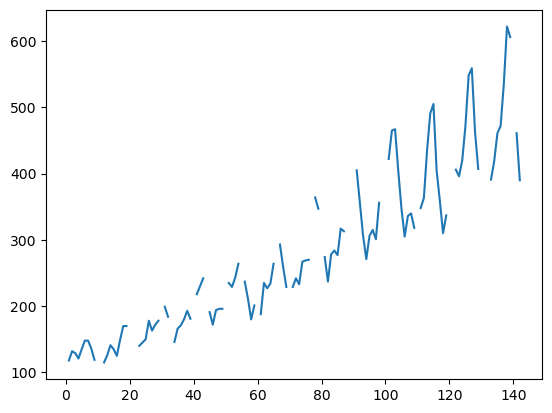

In [25]:
plt.plot(ts_missing)
plt.show()

### Removing missing values

In [26]:
ts_cleaned = pd.Series(ts_missing).dropna()

<Axes: >

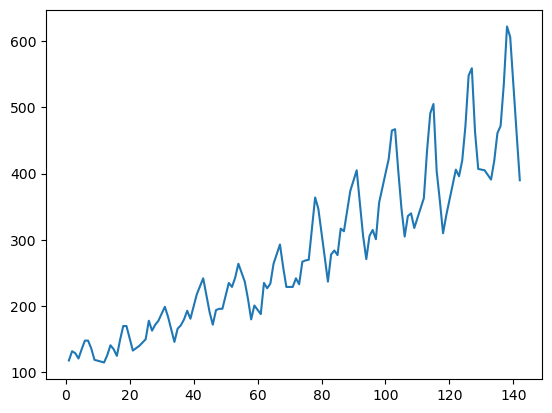

In [27]:
ts_cleaned.plot()

### Imputing Missing Values

In [28]:
from sktime.transformations.series.impute import Imputer

In [29]:
imputer = Imputer(method="mean")

In [30]:
ts_imputed = imputer.fit_transform(ts_missing)

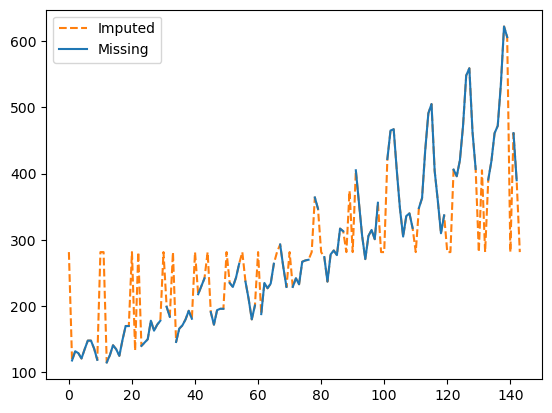

In [31]:
plt.plot(ts_imputed, color="C1", label="Imputed", linestyle="--")
plt.plot(ts_missing, color="C0", label="Missing")
plt.legend()
plt.show()

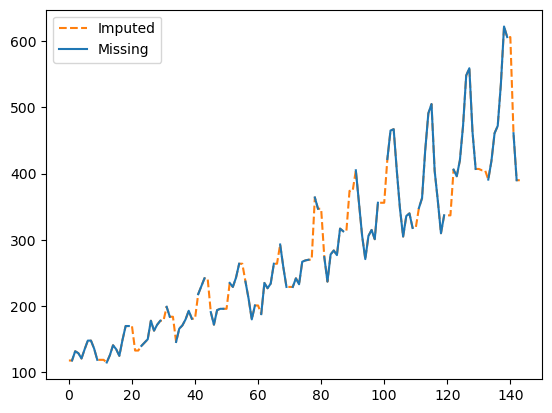

In [32]:
imputer = Imputer(method="ffill")
ts_imputed = imputer.fit_transform(ts_missing)
plt.plot(ts_imputed, color="C1", label="Imputed", linestyle="--")
plt.plot(ts_missing, color="C0", label="Missing")
plt.legend()
plt.show()

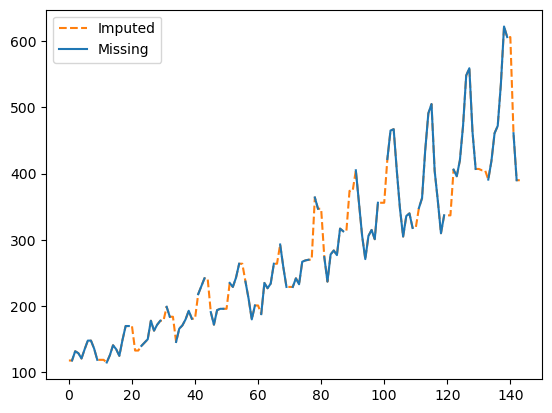

In [33]:
imputer = Imputer(method="ffill")
ts_imputed = imputer.fit_transform(ts_missing)
plt.plot(ts_imputed, color="C1", label="Imputed", linestyle="--")
plt.plot(ts_missing, color="C0", label="Missing")
plt.legend()
plt.show()

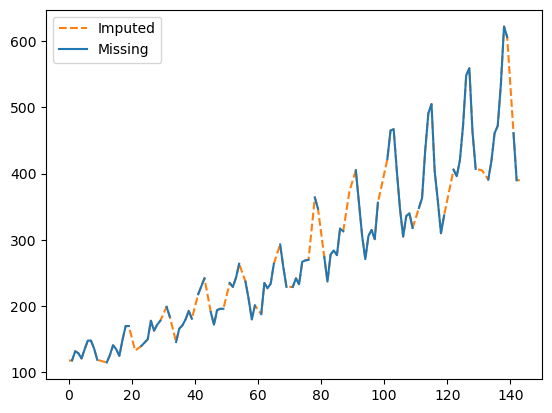

In [34]:
imputer = Imputer(method="linear")
ts_imputed = imputer.fit_transform(ts_missing)
plt.plot(ts_imputed, color="C1", label="Imputed", linestyle="--")
plt.plot(ts_missing, color="C0", label="Missing")
plt.legend()
plt.show()

## Anomalies

In [35]:
from sktime.transformations.series.func_transform import FunctionTransformer

### Hampel Filter

In [36]:
from sktime.transformations.series.outlier_detection import HampelFilter

In [37]:
# here we lower the threshold to detect more outliers (default n_sigma is 3)
annotator = HampelFilter(window_length=12, n_sigma=3, return_bool=True)

In [38]:
labels = annotator.fit_transform(ts).ravel()

/var/folders/s4/m_stzbzs3ng6yxt_k7bj0krw0000gn/T/ipykernel_19481/3923777818.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  labels = annotator.fit_transform(ts).ravel()


/var/folders/s4/m_stzbzs3ng6yxt_k7bj0krw0000gn/T/ipykernel_19481/4027205443.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(ts.ravel())


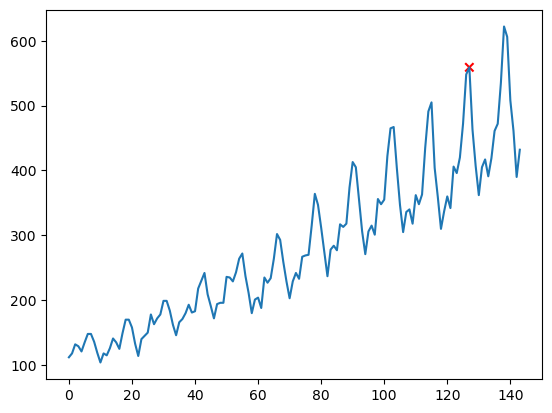

In [39]:
plt.plot(ts.ravel())
plt.scatter(np.arange(len(labels)), ts, alpha=labels, color="red", marker="x")
plt.show()

### Grubbs Test

In [40]:
from scipy import stats

#### Estimation

In [41]:
def grubbs_test(ts, alpha=0.05):
    z_scores = np.abs(stats.zscore(ts))
    threshold = stats.t.ppf((1 + (1-alpha))/2, len(ts) - 2)
    return (z_scores > threshold).astype(int)

In [42]:
# you can use the function directly on the data
labels = grubbs_test(ts)

In [43]:
# or you can use the FunctionTransformer (the advantage is that this is compatible with all sktime features)
transformer = FunctionTransformer(func=grubbs_test, X_type="pd.Series")
labels = transformer.fit_transform(ts)

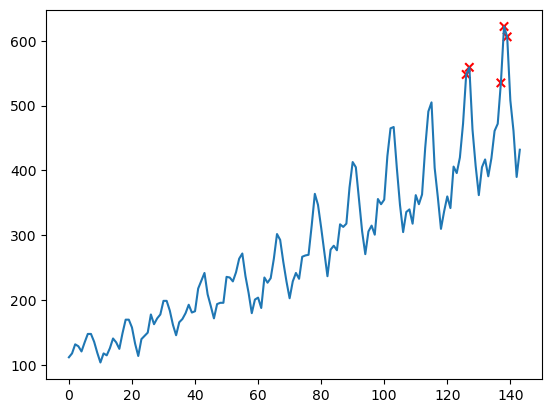

In [44]:
plt.plot(ts.to_numpy())
plt.scatter(np.arange(len(labels)), ts.to_numpy(), alpha=labels.to_numpy(), color="red", marker="x")
plt.show()

#### Prediction

In [45]:
def grubbs_test_prediction(ts, alpha=0.05, starting_win=12):
    initial_labels = list(grubbs_test(ts[:starting_win], alpha))
    for i in range(starting_win, len(ts)):
        initial_labels.append(grubbs_test(np.array(ts)[:i], alpha)[-1])
    return np.array(initial_labels)

In [46]:
# you can use the function directly on the data
labels = grubbs_test_prediction(ts)

In [47]:
# or you can use the FunctionTransformer (the advantage is that this is compatible with all sktime features)
transformer = FunctionTransformer(func=grubbs_test_prediction, X_type="pd.Series")
labels = transformer.fit_transform(ts)

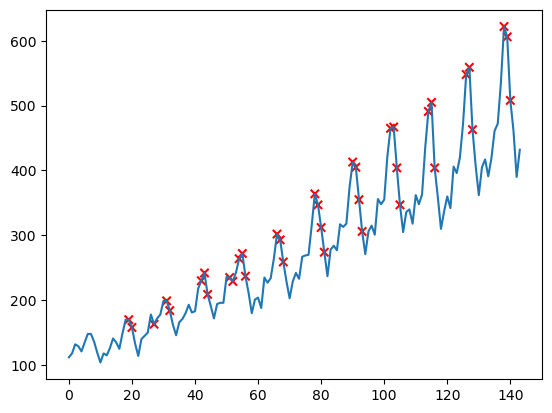

In [48]:
plt.plot(ts.to_numpy())
plt.scatter(np.arange(len(labels)), ts.to_numpy(), alpha=labels.to_numpy(), color="red", marker="x")
plt.show()

### IQR-based

#### Estimation

In [49]:
def iqr_outliers(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers).astype(int)

In [50]:
# again, we decrease the threshold to detect more outliers (default is 1.5)
transformer = FunctionTransformer(func=iqr_outliers, kw_args=dict(k=1), X_type="pd.Series")

In [51]:
labels = transformer.fit_transform(ts)
labels

0      0
1      0
2      0
3      0
4      0
      ..
139    1
140    0
141    0
142    0
143    0
Length: 144, dtype: int64

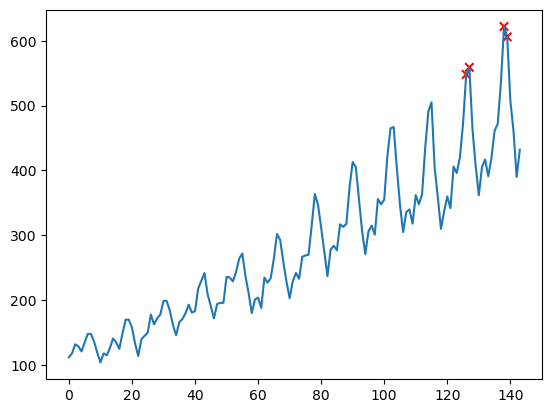

In [52]:
plt.plot(ts.to_numpy())
plt.scatter(np.arange(len(labels)), ts.to_numpy(), alpha=labels, color="red", marker="x")
plt.show()

#### Prediction

In [53]:
def iqr_outliers_prediction(x, k=1.5, starting_win=12):
    initial_labels = list(iqr_outliers(x[:starting_win], k))
    for i in range(starting_win, len(x)):
        initial_labels.append(iqr_outliers(np.array(x)[:i], k)[-1])
    return np.array(initial_labels)

In [54]:
# you can use the function directly on the data
labels = iqr_outliers_prediction(ts)

In [55]:
# or you can use the FunctionTransformer (the advantage is that this is compatible with all sktime features)
transformer = FunctionTransformer(func=iqr_outliers_prediction, kw_args=dict(k=1.5), X_type="pd.Series")
labels = transformer.fit_transform(ts)

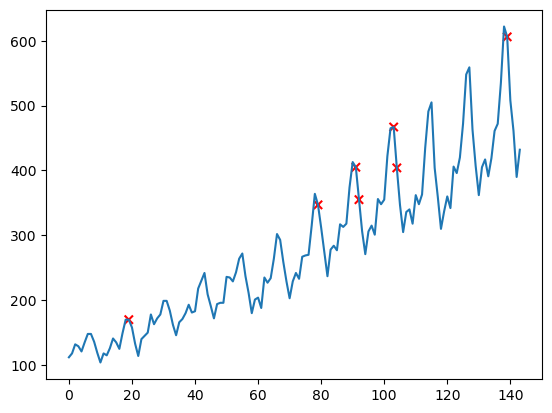

In [56]:
plt.plot(ts.to_numpy())
plt.scatter(np.arange(len(labels)), ts.to_numpy(), alpha=labels, color="red", marker="x")
plt.show()

### Replacing Anomalies

In [57]:
transformer = FunctionTransformer(func=iqr_outliers, kw_args=dict(k=1), X_type="pd.Series")
labels = transformer.fit_transform(ts)

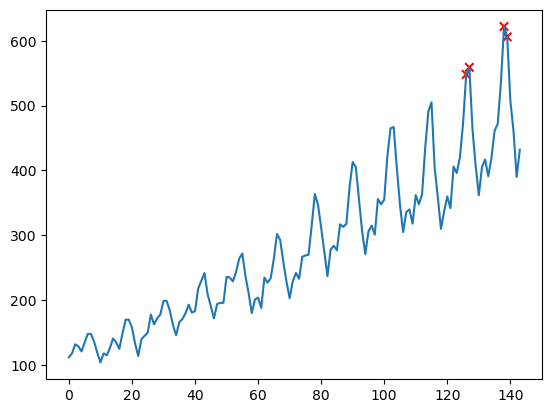

In [58]:
plt.plot(ts.to_numpy())
plt.scatter(np.arange(len(labels)), ts.to_numpy(), alpha=labels, color="red", marker="x")
plt.show()

In [59]:
ts_replaced = ts.copy().to_numpy()
ts_replaced[labels.astype(bool)] = np.nan

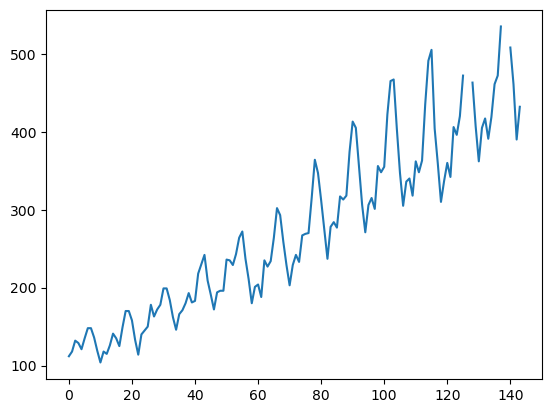

In [60]:
plt.plot(ts_replaced)
plt.show()

In [61]:
imputer = Imputer(method="nearest")

In [62]:
ts_imputed = imputer.fit_transform(ts_replaced)

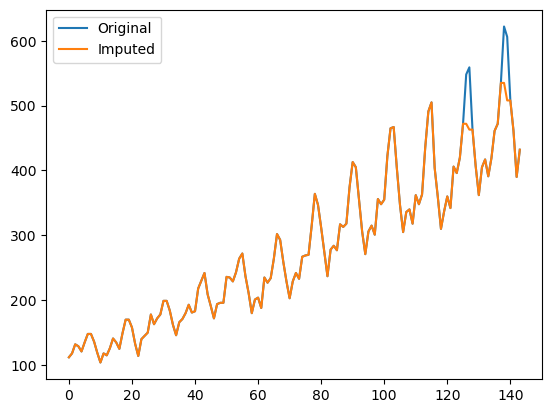

In [63]:
plt.plot(ts.to_numpy(), label="Original")
plt.plot(ts_imputed, label="Imputed")
plt.legend()
plt.show()

## Manipulating Time Series

In [64]:
# let's split the time series into two
ts1 = ts[0: len(ts)//2].to_numpy()
ts2 = ts[len(ts)//2:].to_numpy()

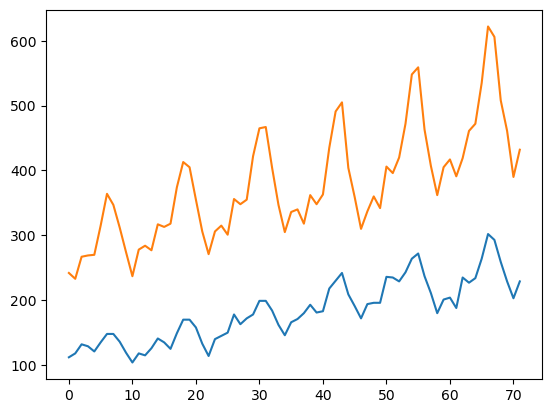

In [65]:
plt.plot(ts1)
plt.plot(ts2)
plt.show()

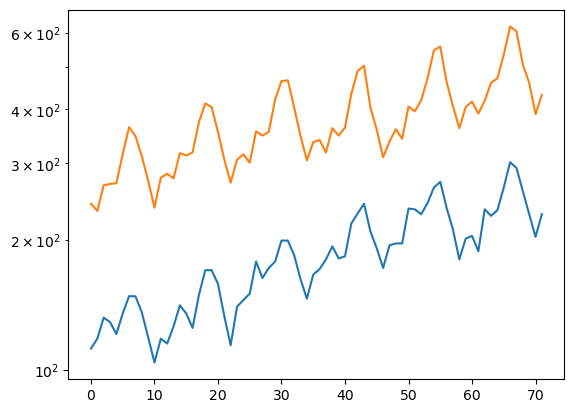

In [66]:
plt.plot(ts1)
plt.plot(ts2)
plt.yscale("log")
plt.show()

## Normalizations

In [67]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor

### Min-Max normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)

In [70]:
ts1_minmax = scaler.fit_transform(ts1.reshape(-1, 1))
ts2_minmax = scaler.fit_transform(ts2.reshape(-1, 1))

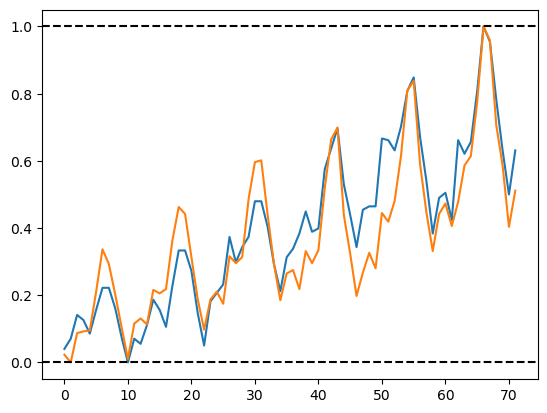

In [71]:
plt.plot(ts1_minmax)
plt.plot(ts2_minmax)
plt.axhline(0, color="black", linestyle="--")
plt.axhline(1, color="black", linestyle="--")
plt.show()

### Offset Transformation

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = TabularToSeriesAdaptor(StandardScaler(with_std=False), fit_in_transform=True)

In [74]:
ts1_offset = scaler.fit_transform(ts1.reshape(-1, 1))
ts2_offset = scaler.fit_transform(ts2.reshape(-1, 1))

In [75]:
ts1_offset.mean(), ts1_offset.std()

(6.315935428978668e-15, 47.371803533977136)

In [76]:
ts2_offset.mean(), ts2_offset.std()

(-1.2631870857957336e-14, 85.8368347002499)

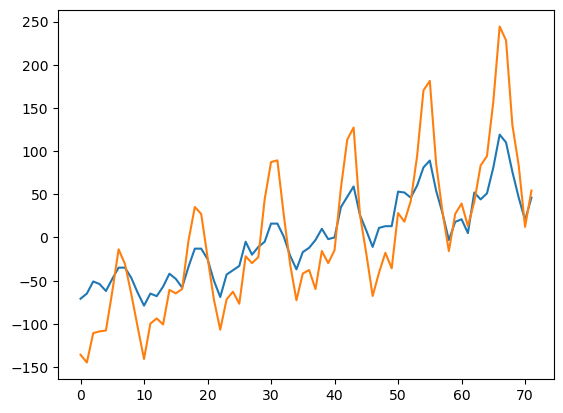

In [77]:
plt.plot(ts1_offset)
plt.plot(ts2_offset)
plt.show()

### Z-score normalization (Amplitude Scaling)

In [78]:
scaler = TabularToSeriesAdaptor(StandardScaler(), fit_in_transform=True)

In [79]:
ts1_zscored = scaler.fit_transform(ts1.reshape(-1, 1))
ts2_zscored = scaler.fit_transform(ts2.reshape(-1, 1))

In [80]:
ts1_zscored.mean(), ts1_zscored.std()

(1.4494578377050655e-16, 0.9999999999999999)

In [81]:
ts2_zscored.mean(), ts2_zscored.std()

(-1.603655480014115e-16, 1.0)

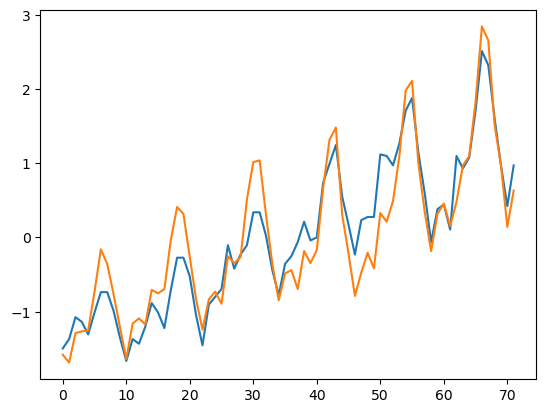

In [82]:
plt.plot(ts1_zscored)
plt.plot(ts2_zscored)
plt.show()


### Smoothing

In [83]:
def moving_average(x, w):
    return x.rolling(window=w).mean()

In [84]:
transformer = FunctionTransformer(func=moving_average, kw_args=dict(w=4), X_type="pd.Series")

In [85]:
ts1_smoothed = transformer.fit_transform(pd.Series(ts1_zscored.ravel()))
ts2_smoothed = transformer.fit_transform(pd.Series(ts2_zscored.ravel()))

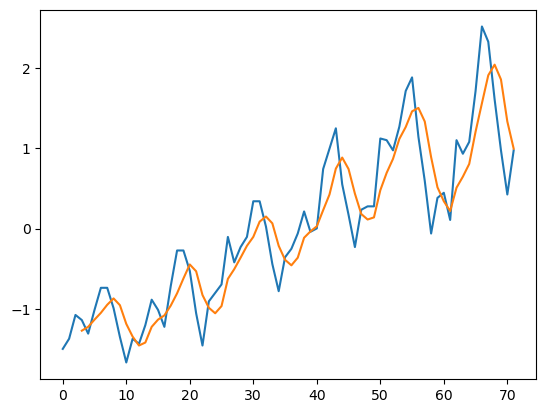

In [86]:
plt.plot(ts1_zscored.ravel())
plt.plot(ts1_smoothed)

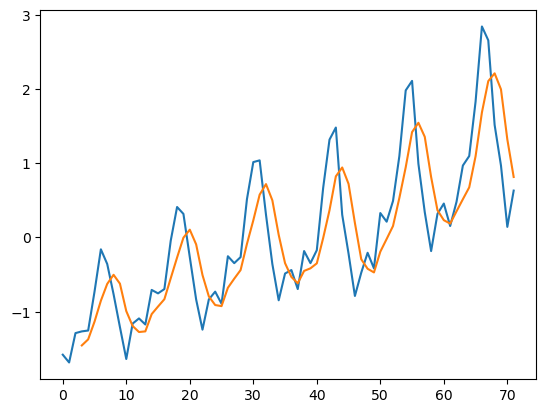

In [87]:
plt.plot(ts2_zscored.ravel())
plt.plot(ts2_smoothed)

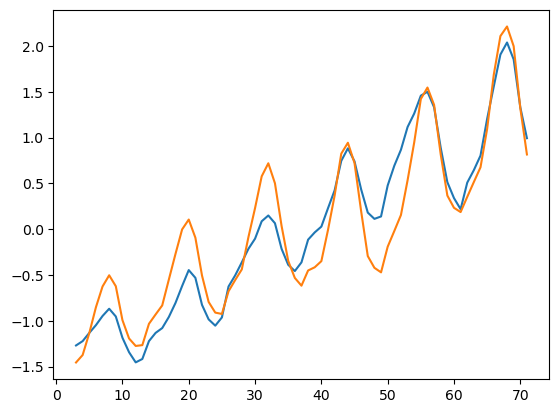

In [88]:
plt.plot(ts1_smoothed)
plt.plot(ts2_smoothed)
plt.show()

#### Log transformation

In [89]:
from sktime.transformations.series.boxcox import LogTransformer

In [90]:
log_transformer = LogTransformer()

In [91]:
ts1_log = log_transformer.fit_transform(ts1)
ts2_log = log_transformer.fit_transform(ts2)

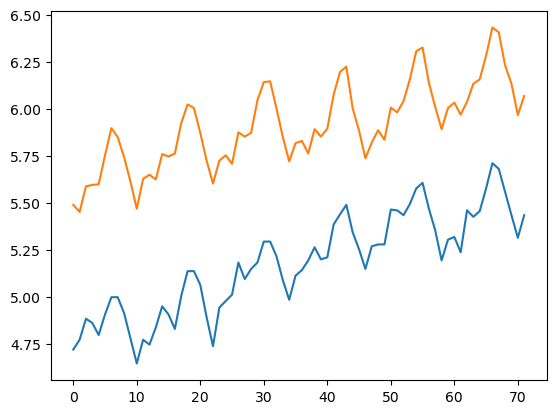

In [92]:
plt.plot(ts1_log)
plt.plot(ts2_log)

### Differencing

In [93]:
from sktime.transformations.series.difference import Differencer

In [94]:
differencer =  Differencer(1)

In [95]:
ts1_diff = differencer.fit_transform(ts1)
ts2_diff = differencer.fit_transform(ts2)

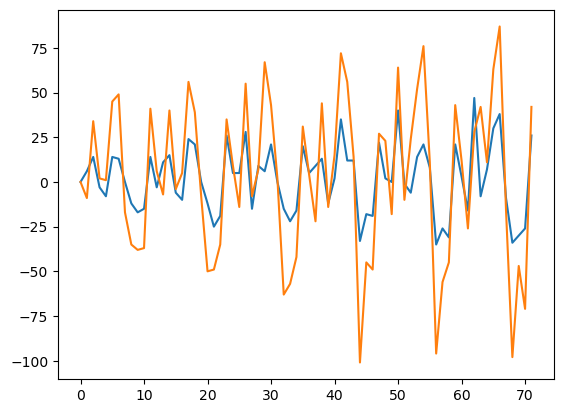

In [96]:
plt.plot(ts1_diff)
plt.plot(ts2_diff)
plt.show()

## Components

In [97]:
from sktime.forecasting.trend import STLForecaster

In [98]:
forecaster = STLForecaster(sp=12)

In [99]:
forecaster.fit(ts1)
ts1_trend = forecaster.trend_
ts1_seasonal = forecaster.seasonal_
ts1_resid = forecaster.resid_

forecaster.fit(ts2)
ts2_trend = forecaster.trend_
ts2_seasonal = forecaster.seasonal_
ts2_resid = forecaster.resid_

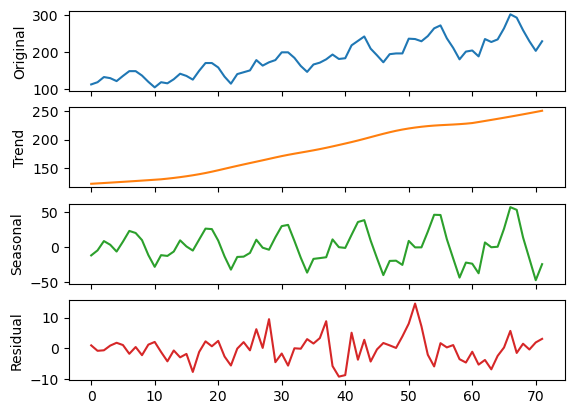

In [100]:
fig, axs = plt.subplots(4, 1, sharex=True)
axs[0].plot(ts1, color="C0")
axs[0].set_ylabel("Original")
axs[1].plot(ts1_trend, color="C1")
axs[1].set_ylabel("Trend")
axs[2].plot(ts1_seasonal, color="C2")
axs[2].set_ylabel("Seasonal")
axs[3].plot(ts1_resid, color="C3")
axs[3].set_ylabel("Residual")
plt.show()

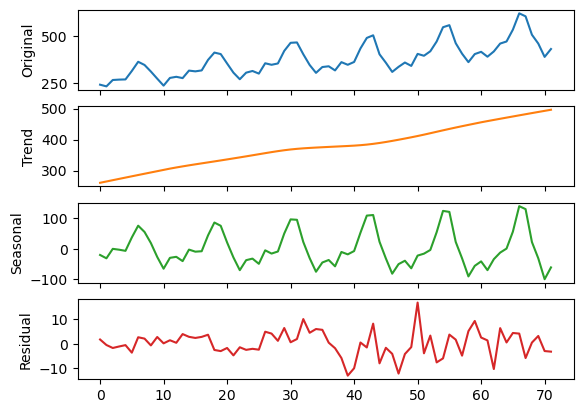

In [101]:
fig, axs = plt.subplots(4, 1,  sharex=True)
axs[0].plot(ts2, color="C0")
axs[0].set_ylabel("Original")
axs[1].plot(ts2_trend, color="C1")
axs[1].set_ylabel("Trend")
axs[2].plot(ts2_seasonal, color="C2")
axs[2].set_ylabel("Seasonal")
axs[3].plot(ts2_resid, color="C3")
axs[3].set_ylabel("Residual")
plt.show()

## Stationarity

In [102]:
from sktime.param_est.stationarity import StationarityADF
from statsmodels.tsa.stattools import adfuller

In [103]:
adfuller(ts)

(0.8153688792060371,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [104]:
sty_est = StationarityADF()  
sty_est.fit(ts)  
sty_est.stationary_

False

### Detrend

In [105]:
from sktime.transformations.series.detrend import Detrender

In [106]:
# linear detrending
detrender = Detrender()

In [107]:
ts_detrended = detrender.fit_transform(ts)

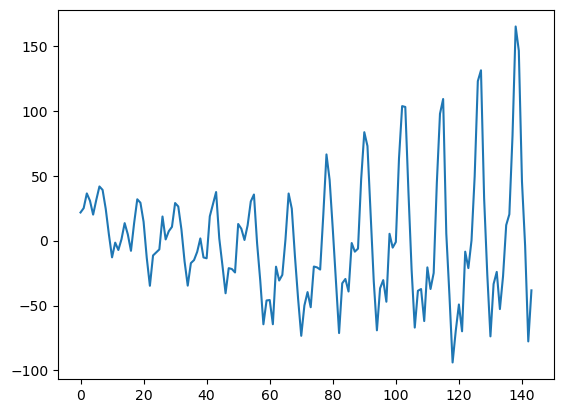

In [108]:
plt.plot(ts_detrended.to_numpy())
plt.show()

### Deseasonalize

In [109]:
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.utils.plotting import plot_correlations

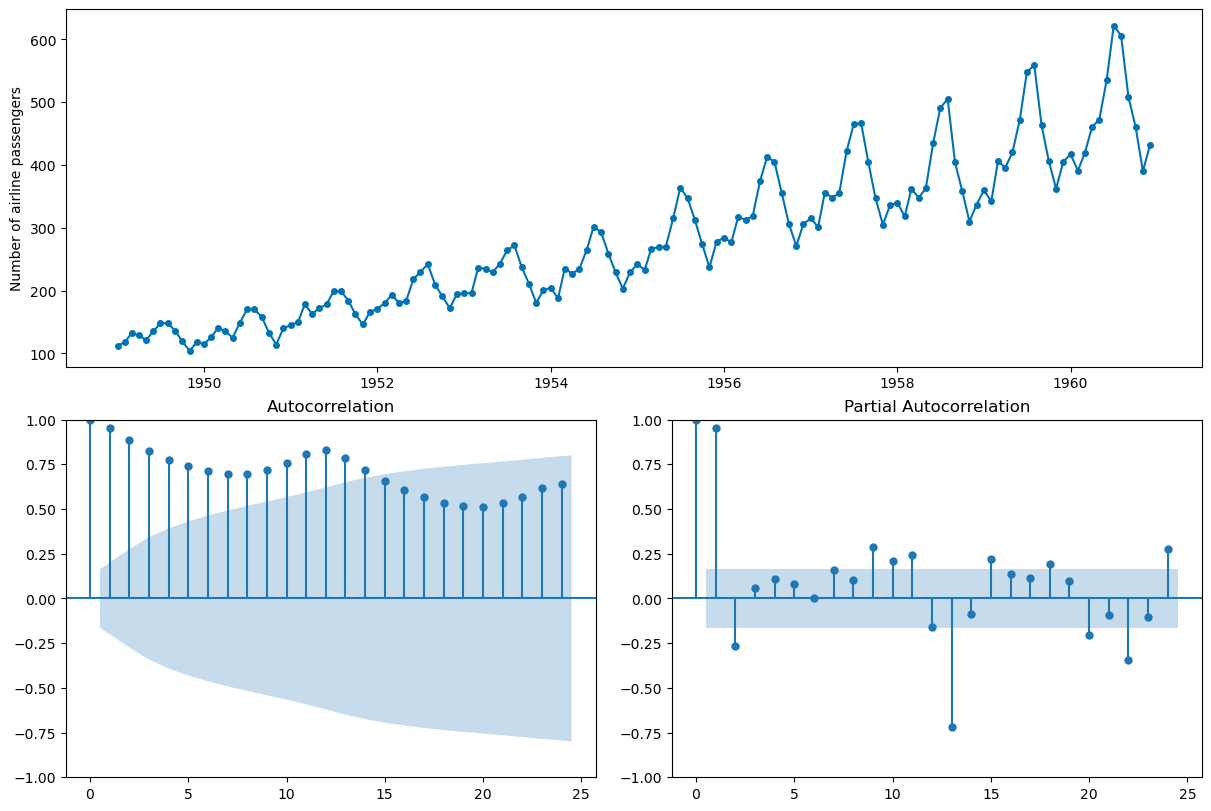

In [110]:
plot_correlations(ts)
plt.show()

In [111]:
deseasonalizer = Deseasonalizer(sp=12, model="multiplicative")  # yearly seasonality

In [112]:
ts_deseasonalized = deseasonalizer.fit_transform(ts)

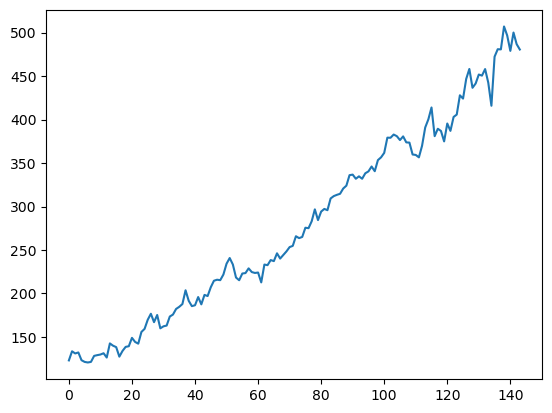

In [113]:
plt.plot(ts_deseasonalized.to_numpy())

### Detrend and Deseasonalize

In [114]:
detr_dese = Detrender(model="multiplicative") * Deseasonalizer(sp=12, model="multiplicative")  # this is a pipeline
detr_dese

TransformerPipeline(steps=[Detrender(model='multiplicative'),
                           Deseasonalizer(model='multiplicative', sp=12)])

In [115]:
ts_detr_dese = detr_dese.fit_transform(ts)

In [116]:
sty_est = StationarityADF()  
sty_est.fit(ts_detr_dese)  
sty_est.stationary_

True

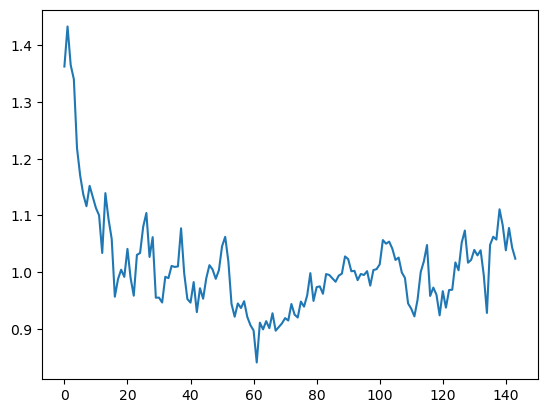

In [117]:
plt.plot(ts_detr_dese.to_numpy())

## Pipeline

In [118]:
# without pipeline
ts1_log = LogTransformer().fit_transform(ts1)
ts1_det = Detrender().fit_transform(ts1_log)
ts1_scaled = StandardScaler().fit_transform(ts1_det)

In [119]:
from sktime.pipeline import make_pipeline

In [120]:
pipe = make_pipeline(LogTransformer(), Detrender(), TabularToSeriesAdaptor(StandardScaler(), fit_in_transform=True))

In [121]:
ts1_pipe = pipe.fit_transform(ts1.reshape(-1, 1))
ts2_pipe = pipe.fit_transform(ts2.reshape(-1, 1))

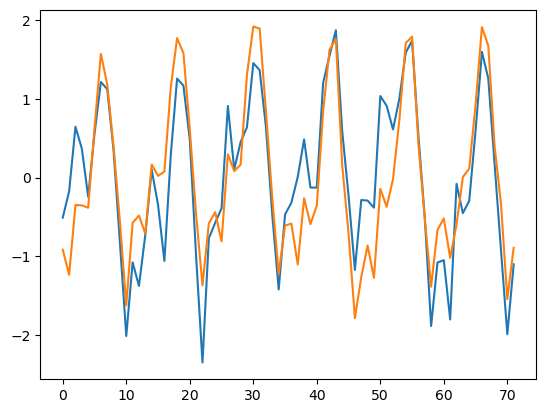

In [122]:
plt.plot(ts1_pipe)
plt.plot(ts2_pipe)
plt.show()

## Multivariate Time Series

In [123]:
from sktime.datasets import load_uschange

In [124]:
_, X = load_uschange()

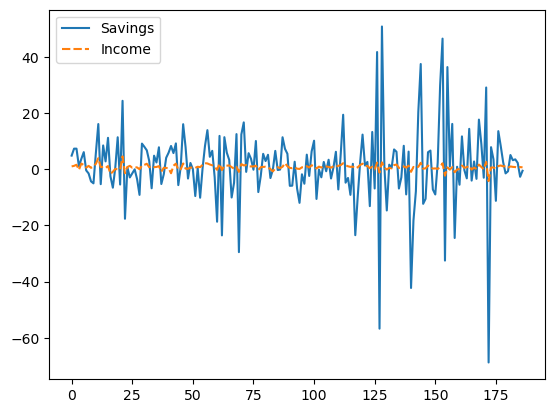

In [125]:
sns.lineplot(X[["Savings", "Income"]])
plt.show()

In [126]:
pipe = make_pipeline(TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True), FunctionTransformer(func=np.log1p), Differencer(1))
# this is equivalent to the following
# pipe = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True) * FunctionTransformer(func=np.log1p) * Differencer(1)
pipe

TransformerPipeline(steps=[TabularToSeriesAdaptor(fit_in_transform=True,
                                                  transformer=MinMaxScaler()),
                           FunctionTransformer(func=<ufunc 'log1p'>),
                           Differencer()])

In [127]:
X_transformed = pipe.fit_transform(X)

<Axes: >

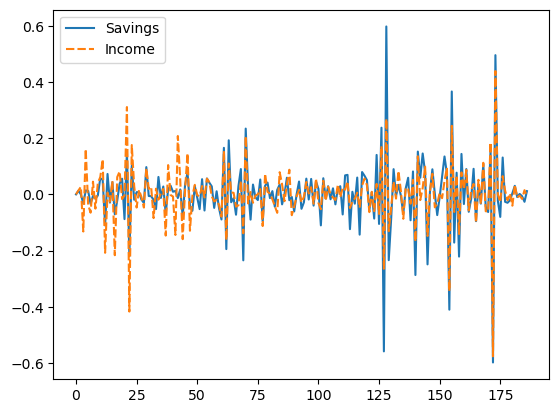

In [128]:
sns.lineplot(X_transformed[["Savings", "Income"]])